In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\perama\AppData\Local\Temp\ipykernel_27236\278876023.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
print("Definiendo los simbolos de stock")
symbol_data_to_load = ['Otro','EXC','NEE','SO','DUK'] #Creo una lista con los nombres de los archivos

list_of_df = [] #Creo una lista vacía, donde en cada posición, voy a guardar cada data frame

# Ciclo sobre simbolos para llenar la lista de dataframes
print(" --- Inicio de Loop --- ")
for i in symbol_data_to_load:
    print("Procesando Simbolo: " + i)
    temp_df = pd.read_csv(i+'.csv',sep=',')
    temp_df['Volume_Millions'] = temp_df['Volume'] / 1000000.0 #Creo una columna Volume_Millons para exresar en unidades más pequeñas, a raíz de dividir por 1 millón la columna de Volume
    temp_df['Symbol'] = i # Creo una nueva columna llamada Symbo con el nombre del simbolo 
    list_of_df.append(temp_df) # Agrego el data frame a la lista

print(" --- Completado loop simbolos --- ")
print(list_of_df)

Definiendo los simbolos de stock
 --- Inicio de Loop --- 
Procesando Simbolo: Otro
Procesando Simbolo: EXC
Procesando Simbolo: NEE
Procesando Simbolo: SO
Procesando Simbolo: DUK
 --- Completado loop simbolos --- 
[            Date       Open       High        Low      Close  Adj Close  \
0     2014-07-28  69.750000  71.059998  69.750000  70.879997  57.963978   
1     2014-07-29  70.669998  70.980003  69.930000  69.930000  57.187099   
2     2014-07-30  70.000000  70.660004  68.400002  68.970001  56.402020   
3     2014-07-31  68.629997  68.849998  67.580002  67.639999  55.314388   
4     2014-08-01  67.330002  68.410004  67.220001  67.589996  55.273487   
...          ...        ...        ...        ...        ...        ...   
1254  2019-07-22  76.879997  76.930000  75.779999  76.260002  76.260002   
1255  2019-07-23  76.099998  76.199997  75.269997  75.430000  75.430000   
1256  2019-07-24  75.660004  75.720001  74.889999  75.180000  75.180000   
1257  2019-07-25  75.150002  75.4300

In [5]:
# En un nuevo Data Frame, pego cada uno de los data frames, uno debajo del otro (por eso axis =0)
# En éste caso, a partir de una lista de dataframes, creo uno nuevo poniendo uno debajo del otro.
print("Agregando la data")
agg_df = pd.concat(list_of_df, axis=0)
print(agg_df)

Agregando la data
            Date       Open       High        Low      Close  Adj Close  \
0     2014-07-28  69.750000  71.059998  69.750000  70.879997  57.963978   
1     2014-07-29  70.669998  70.980003  69.930000  69.930000  57.187099   
2     2014-07-30  70.000000  70.660004  68.400002  68.970001  56.402020   
3     2014-07-31  68.629997  68.849998  67.580002  67.639999  55.314388   
4     2014-08-01  67.330002  68.410004  67.220001  67.589996  55.273487   
...          ...        ...        ...        ...        ...        ...   
1254  2019-07-22  88.599998  88.690002  87.839996  88.150002  88.150002   
1255  2019-07-23  88.180000  88.239998  87.370003  87.680000  87.680000   
1256  2019-07-24  87.949997  87.980003  86.800003  87.180000  87.180000   
1257  2019-07-25  86.900002  87.389999  86.169998  86.489998  86.489998   
1258  2019-07-26  86.500000  87.080002  86.269997  86.910004  86.910004   

       Volume  Volume_Millions Symbol  
0     1806400           1.8064   Otro  
1

In [6]:
#Ahora voy a sacar los retornos diarios de las acciones

print('Calculando estadisticas finales')
agg_df['VolStat'] = (agg_df['High'] - agg_df['Low']) / agg_df['Open'] #Creo una columna VolStat con la variabilidad entre el High, Low y el Open
agg_df['Return'] = (agg_df['Close'] / agg_df['Open']) - 1.0 #Creo la columna de retornos

print("agg_df DataFrame dimension (filas, columnas): ") #Muestro cuantas filas y columna tengo
print(agg_df.shape) 

print("Head del DataFrame agg_df: ")
agg_df


Calculando estadisticas finales
agg_df DataFrame dimension (filas, columnas): 
(6295, 11)
Head del DataFrame agg_df: 


,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Millions,Symbol,VolStat,Return
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,1.8064,Otro,0.018781,0.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,2.2311,Otro,0.014858,-0.010471
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,2.5889,Otro,0.032286,-0.014714
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,3.2669,Otro,0.018505,-0.014425
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,2.6018,Otro,0.017674,0.003861
...,...,...,...,...,...,...,...,...,...,...,...
1254,2019-07-22,88.599998,88.690002,87.839996,88.150002,88.150002,2160300,2.1603,DUK,0.009594,-0.005079
1255,2019-07-23,88.180000,88.239998,87.370003,87.680000,87.680000,3141800,3.1418,DUK,0.009866,-0.005670
1256,2019-07-24,87.949997,87.980003,86.800003,87.180000,87.180000,2386500,2.3865,DUK,0.013417,-0.008755
1257,2019-07-25,86.900002,87.389999,86.169998,86.489998,86.489998,2680300,2.6803,DUK,0.014039,-0.004718


In [7]:
l=[x for x in agg_df.columns if x not in ['Date','Volume','Symbol']] #Creo una lista con todas las columnas a excpeción de Date, Volume y Symbol
agg_df[l] #Muestro las columnas que cree en la lista arriba

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861
...,...,...,...,...,...,...,...,...
1254,88.599998,88.690002,87.839996,88.150002,88.150002,2.1603,0.009594,-0.005079
1255,88.180000,88.239998,87.370003,87.680000,87.680000,3.1418,0.009866,-0.005670
1256,87.949997,87.980003,86.800003,87.180000,87.180000,2.3865,0.013417,-0.008755
1257,86.900002,87.389999,86.169998,86.489998,86.489998,2.6803,0.014039,-0.004718


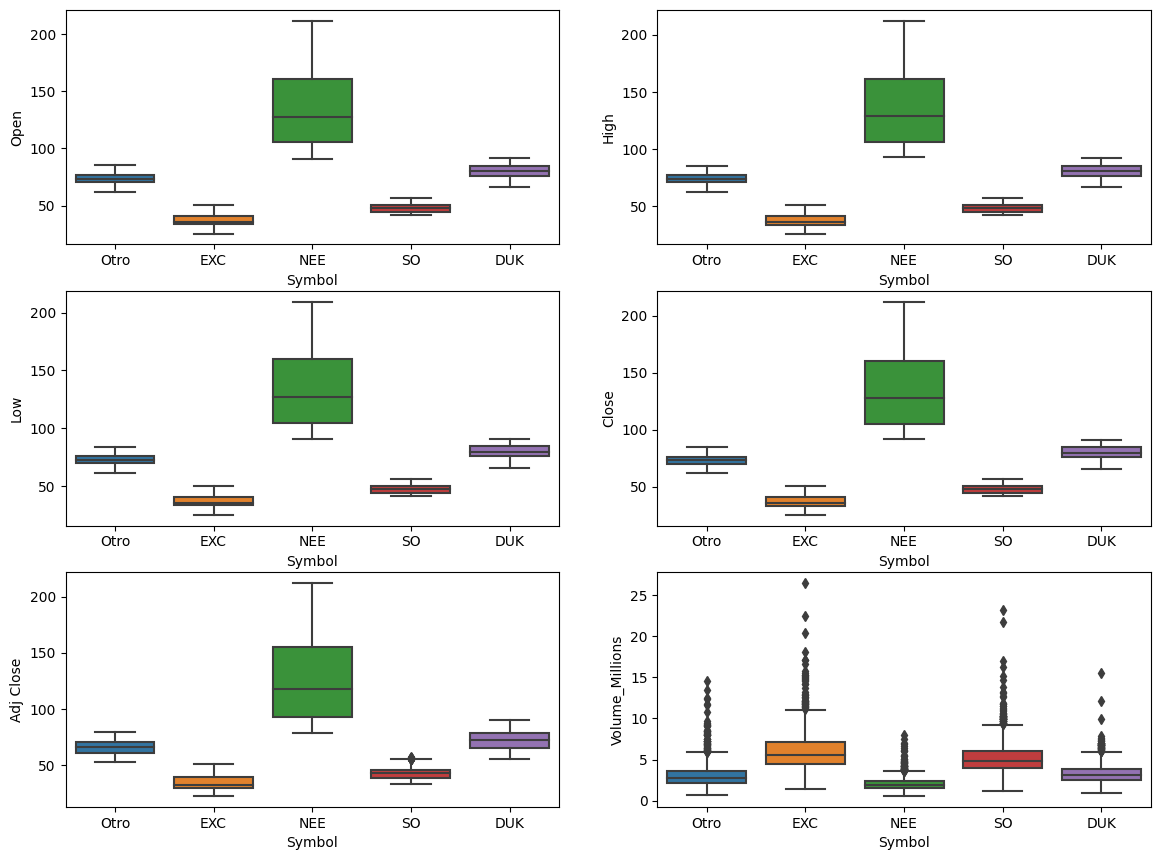

In [15]:
# Seleccionar las columnas de interes 
import matplotlib.pyplot as plt

l=[x for x in agg_df.columns if x not in ['Date','Volume']] #Cargo todas las columnas a excepción de Date y Volume
plt.figure(figsize=(14,14)) #Creo un lienzo de 14x14
for x,column in zip(range(8),agg_df[l]): #Acá digo que voy a iterar hasta 8 y voy a guardar el nombre de la columna de cada bucle en la variable Column
    if x<=5:
      plt.subplot(4,2,x+1)
      sns.boxplot(data=agg_df[l], y=column, x=agg_df[l]['Symbol'])

In [8]:
l=[x for x in agg_df.columns if x not in ['Date','Volume','Symbol']]
datos= agg_df[l]
datos.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861


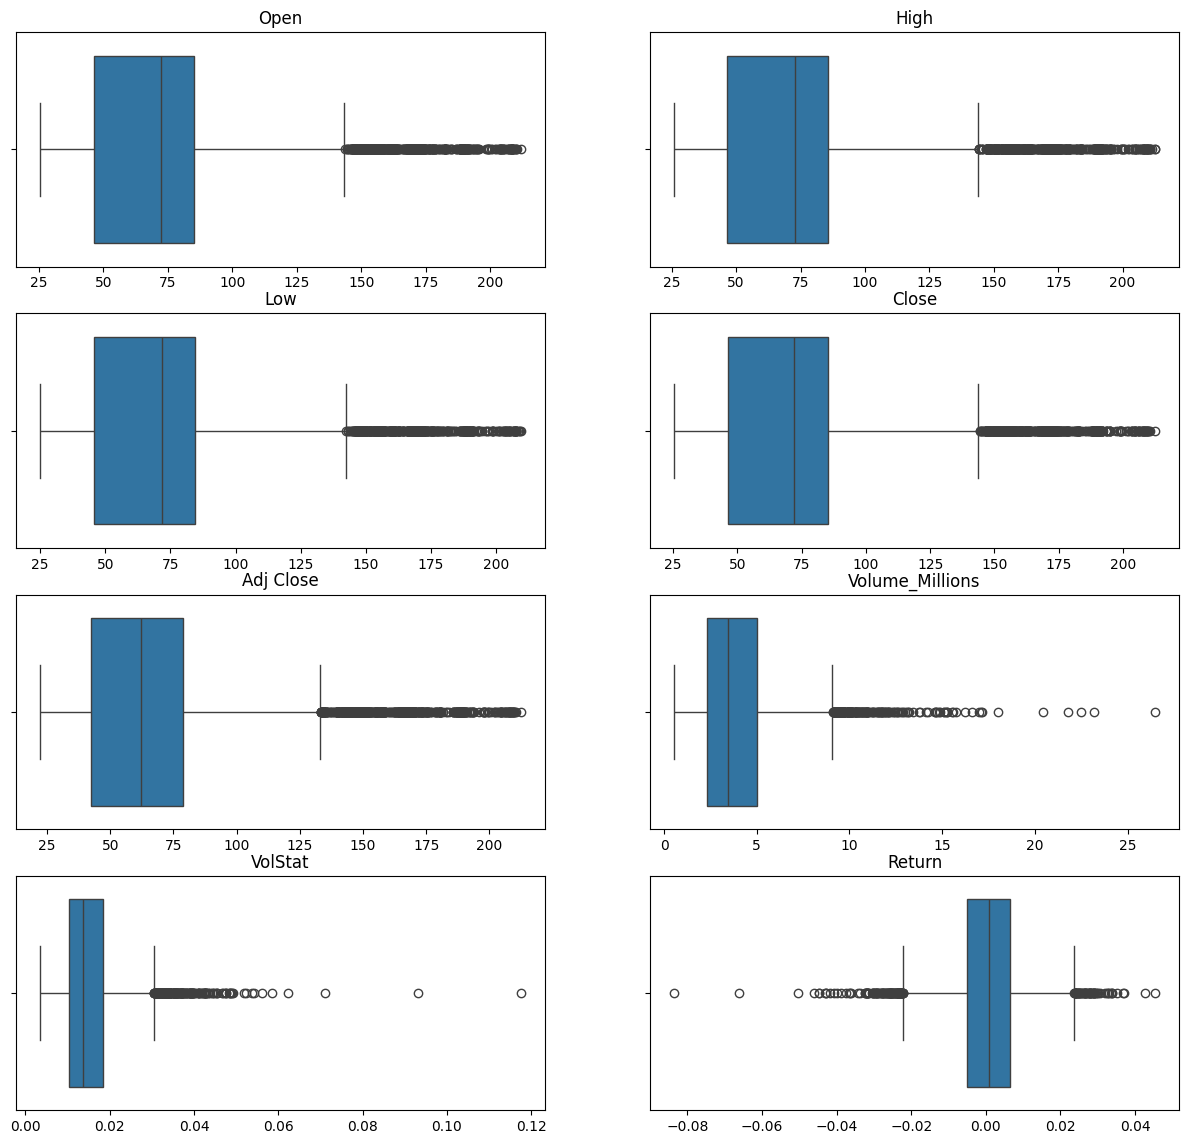

In [9]:
plt.figure(figsize=(15,14))
for i,j in zip(range(8),datos.columns):
  plt.subplot(4,2,i+1)
  sns.boxplot(x=datos[j])
  plt.title(j)
  plt.xlabel('')

In [10]:
# Cargar datos
datos= agg_df[agg_df['Symbol']=='Otro']
l=[x for x in agg_df.columns if x not in ['Volume','Symbol']]
datos=datos[l]
datos['Date']=pd.to_datetime(datos['Date'])
datos.head()

,Date,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861


In [11]:
# Convertir a z score
datos_z=pd.DataFrame() #Creo un data frame nuevo vacío
for j in datos.columns[1:]: #Un bucle for para iterar desde la columna 1 en adelante
  datos_z[j] = (datos[j] - datos[j].mean()) / datos[j].std() #Normalizo todos los valores a una distribución normal y los guardo en la columna j
datos_z['Fecha']= datos.Date # Creo una columna Fecha donde guardo el valor de la columna Date del DF datos
datos_z.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return,Fecha
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499,2014-07-28
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735,2014-07-29
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938,2014-07-30
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671,2014-07-31
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729,2014-08-01
